**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick

**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

**Abrindo um arquivo CSV do drive**

In [ ]:
base = pd.read_csv('/content/sample_data/drug200.csv', ';')

<ipython-input-345-1a6a59d54381>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  base = pd.read_csv('/content/sample_data/drug200.csv', ';')


In [ ]:
base

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Balanceando a Base**

In [ ]:
sampling_strategy = {
    'drugA': 23,
    'drugB': 16,
    'drugC': 16,
    'drugX': 35,
    'drugY': 40
}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=0)
X_prev = base.iloc[:, 0:5].values
y_classe = base.iloc[:, 5].values

X_prev, y_classe = rus.fit_resample(X_prev, y_classe)

In [ ]:
X_prev

array([[32, 'F', 'HIGH', 'NORMAL', 10.292],
       [50, 'M', 'HIGH', 'HIGH', 7.49],
       [47, 'M', 'HIGH', 'HIGH', 10.403],
       [39, 'M', 'HIGH', 'HIGH', 9.664],
       [48, 'M', 'HIGH', 'NORMAL', 10.446],
       [32, 'M', 'HIGH', 'NORMAL', 9.445],
       [49, 'M', 'HIGH', 'NORMAL', 6.269],
       [23, 'M', 'HIGH', 'HIGH', 8.011],
       [49, 'M', 'HIGH', 'NORMAL', 8.7],
       [31, 'M', 'HIGH', 'NORMAL', 11.871],
       [19, 'F', 'HIGH', 'HIGH', 13.313],
       [31, 'M', 'HIGH', 'NORMAL', 11.227],
       [29, 'M', 'HIGH', 'HIGH', 12.856],
       [37, 'F', 'HIGH', 'HIGH', 13.091],
       [36, 'F', 'HIGH', 'HIGH', 11.198],
       [20, 'F', 'HIGH', 'HIGH', 11.262],
       [45, 'F', 'HIGH', 'HIGH', 12.854],
       [38, 'F', 'HIGH', 'NORMAL', 11.326],
       [42, 'M', 'HIGH', 'NORMAL', 12.766],
       [24, 'M', 'HIGH', 'NORMAL', 9.475],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [26, 'F', 'HIGH', 'NORMAL', 12.307],
       [35, 'F', 'HIGH', 'HIGH', 12.894],
       [60, 'M', 'HIGH

**Contando quantidade de instâncias**


In [ ]:
np.unique(y_classe, return_counts=True)

(array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object),
 array([23, 16, 16, 35, 40]))

**Plotando gráfico antes e depois do Balanceamento**

**Antes:**

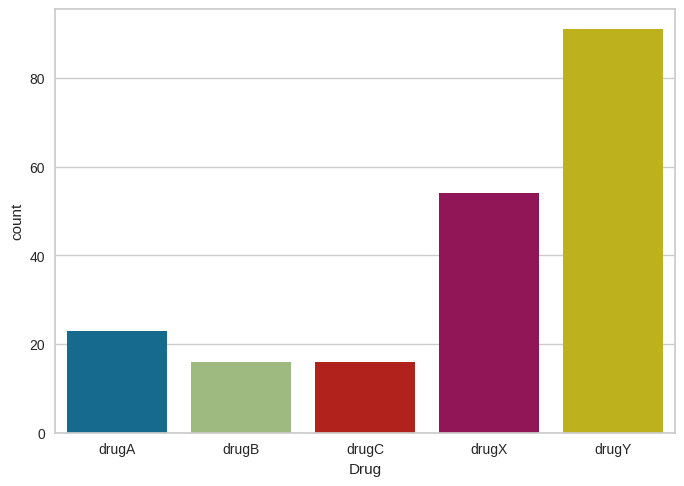

In [ ]:
sns.countplot(x = base['Drug'], order=unique_values);

**Depois:**

<Axes: ylabel='count'>

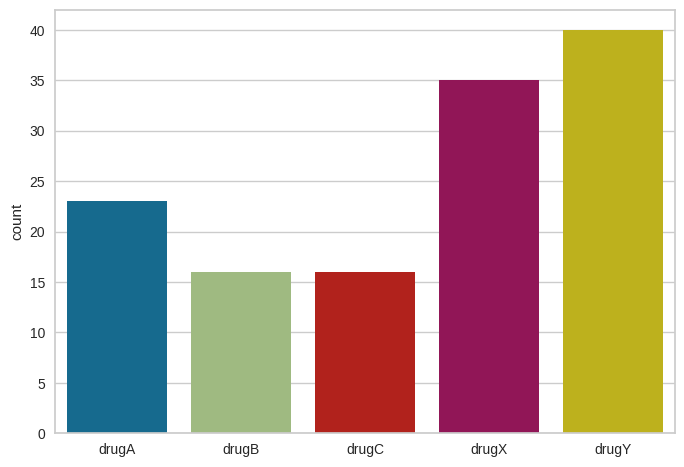

In [ ]:
sns.countplot(x = y_classe, order=unique_values)

**Separando os atributos de entrada e de classe**

In [ ]:
X_prev_label = base.iloc[:, 0:5]

In [ ]:
X_prev_label

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
y_classe

array(['drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA',
       'drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA',
       'drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA', 'drugA',
       'drugA', 'drugA', 'drugB', 'drugB', 'drugB', 'drugB', 'drugB',
       'drugB', 'drugB', 'drugB', 'drugB', 'drugB', 'drugB', 'drugB',
       'drugB', 'drugB', 'drugB', 'drugB', 'drugC', 'drugC', 'drugC',
       'drugC', 'drugC', 'drugC', 'drugC', 'drugC', 'drugC', 'drugC',
       'drugC', 'drugC', 'drugC', 'drugC', 'drugC', 'drugC', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'dru

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X_prev[:,0]

array([32, 50, 47, 39, 48, 32, 49, 23, 49, 31, 19, 31, 29, 37, 36, 20, 45,
       38, 42, 24, 43, 26, 35, 60, 57, 58, 59, 70, 68, 55, 60, 70, 51, 74,
       65, 60, 53, 72, 68, 47, 22, 68, 26, 16, 23, 41, 59, 49, 28, 47, 47,
       32, 56, 47, 72, 22, 36, 50, 59, 24, 43, 60, 39, 40, 37, 23, 64, 45,
       50, 53, 20, 51, 56, 35, 46, 72, 40, 69, 65, 30, 28, 49, 34, 69, 32,
       39, 37, 23, 66, 20, 28, 58, 38, 52, 47, 21, 45, 23, 39, 74, 34, 43,
       32, 16, 25, 39, 26, 42, 61, 51, 28, 57, 15, 53, 62, 34, 70, 19, 74,
       18, 43, 61, 37, 29, 42, 24, 69, 68, 42, 16], dtype=object)

In [ ]:
label_encoder_Sex = LabelEncoder()

In [ ]:
X_prev[:,1] = label_encoder_Sex.fit_transform(X_prev[:,1])
X_prev[:, 2] = [2 if x == 'HIGH' else 1 if x == 'NORMAL' else 0 for x in X_prev[:, 2]]
X_prev[:, 3] = [1 if x == 'HIGH' else 0 for x in X_prev[:, 3]]

In [ ]:
X_prev

array([[32, 0, 2, 0, 10.292],
       [50, 1, 2, 1, 7.49],
       [47, 1, 2, 1, 10.403],
       [39, 1, 2, 1, 9.664],
       [48, 1, 2, 0, 10.446],
       [32, 1, 2, 0, 9.445],
       [49, 1, 2, 0, 6.269],
       [23, 1, 2, 1, 8.011],
       [49, 1, 2, 0, 8.7],
       [31, 1, 2, 0, 11.871],
       [19, 0, 2, 1, 13.313],
       [31, 1, 2, 0, 11.227],
       [29, 1, 2, 1, 12.856],
       [37, 0, 2, 1, 13.091],
       [36, 0, 2, 1, 11.198],
       [20, 0, 2, 1, 11.262],
       [45, 0, 2, 1, 12.854],
       [38, 0, 2, 0, 11.326],
       [42, 1, 2, 0, 12.766],
       [24, 1, 2, 0, 9.475],
       [43, 1, 2, 1, 13.972],
       [26, 0, 2, 0, 12.307],
       [35, 0, 2, 1, 12.894],
       [60, 1, 2, 0, 8.621],
       [57, 0, 2, 0, 9.945],
       [58, 0, 2, 0, 14.239],
       [59, 1, 2, 1, 13.935],
       [70, 1, 2, 1, 9.849],
       [68, 0, 2, 0, 10.189],
       [55, 0, 2, 1, 10.977],
       [60, 1, 2, 1, 13.934],
       [70, 1, 2, 1, 13.967],
       [51, 1, 2, 0, 11.343],
       [74, 1, 2, 1, 9.

In [ ]:
X_prev.shape

(130, 5)

**Método de amostragem Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_classe.shape

(130,)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.3, random_state=42, stratify=y_classe)

In [ ]:
X_treino.shape, X_teste.shape

((91, 5), (39, 5))

**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [ ]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8974358974358975

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[ 7,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  3,  7,  0],
       [ 0,  0,  0,  0, 12]])

0.8974358974358975

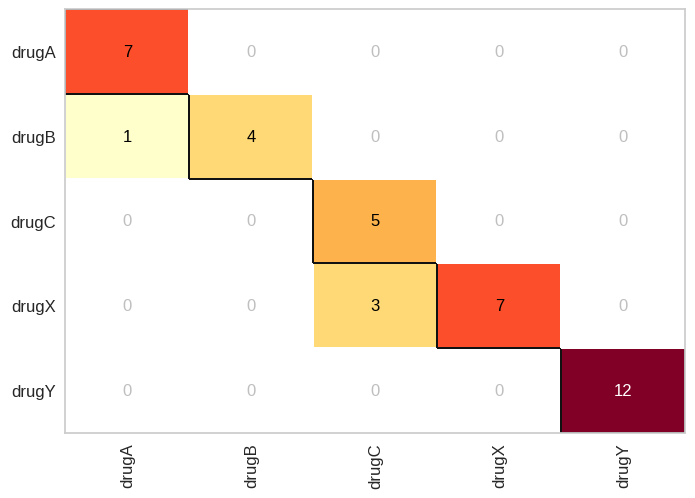

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       1.00      0.80      0.89         5
       drugC       0.62      1.00      0.77         5
       drugX       1.00      0.70      0.82        10
       drugY       1.00      1.00      1.00        12

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.88        39
weighted avg       0.93      0.90      0.90        39



**Vamos ver a árvore?**

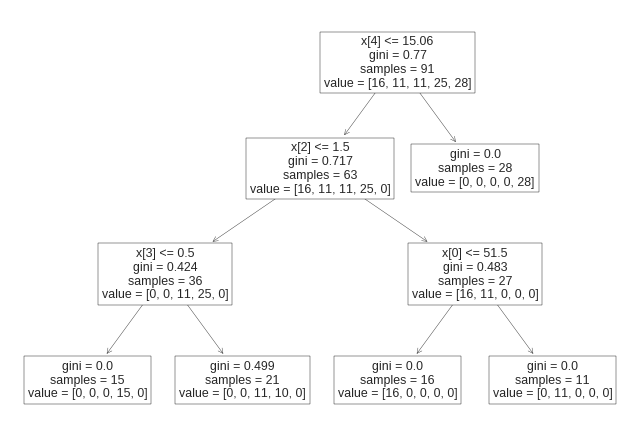

In [ ]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

# **Árvore Final**

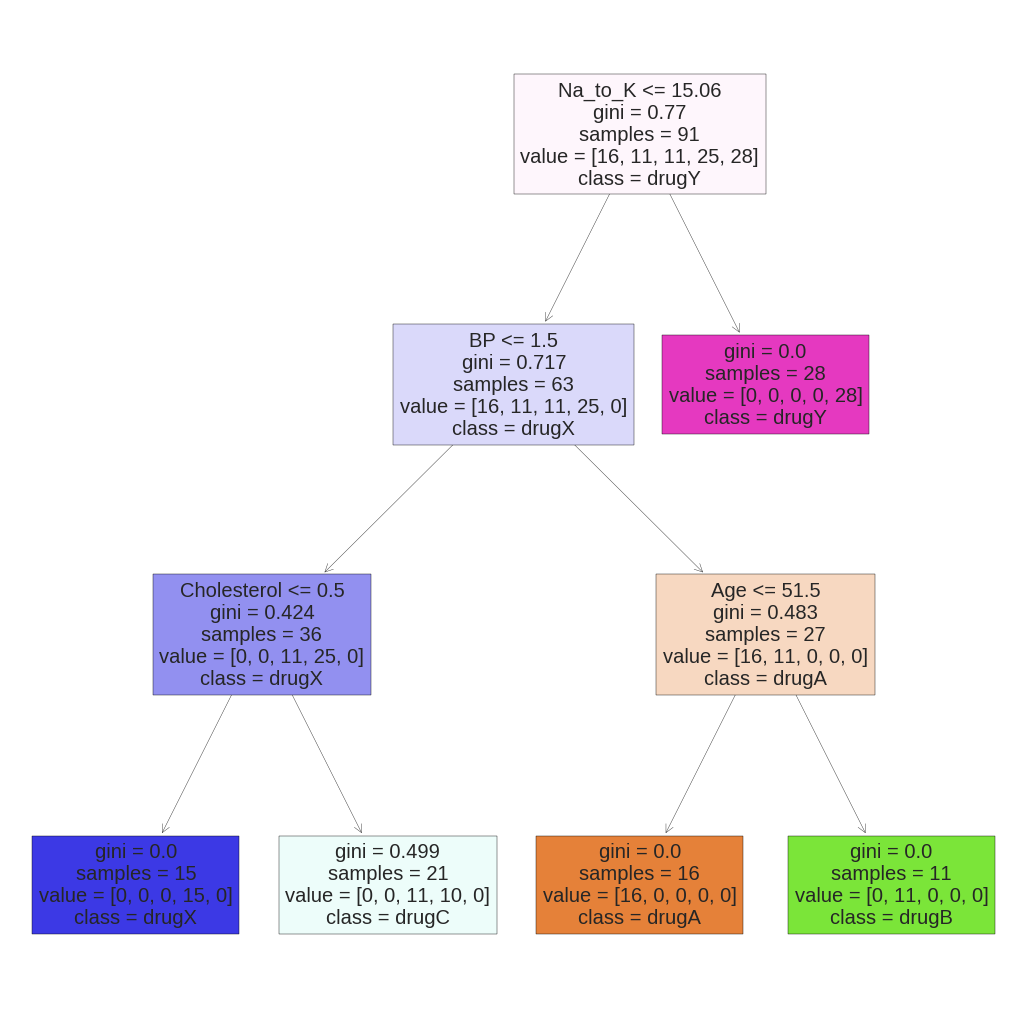

In [ ]:
from sklearn import tree
previsores = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);